# Analysis and Visualization of Complex Agro-Environmental Data
---
## Visualizing statistical distributions
### Uniform distribution
A uniform distribution - also known as a rectangular distribution - is a distribution that has constant probability between sampling bounds (minimum and maximum values).


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform

OptionError: No such keys(s): 'mode.use_inf_as_null'

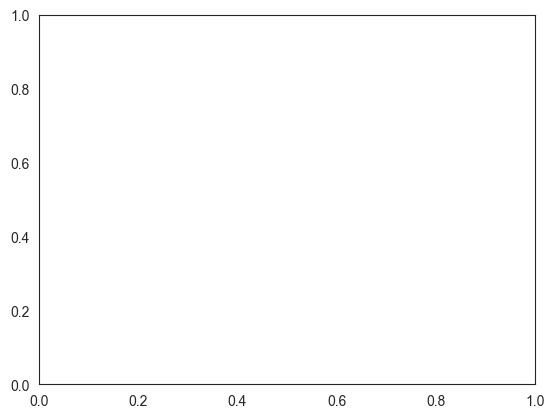

In [5]:
number = 10000
start = 20
width = 25

uniform_data = uniform.rvs(size=number, loc=start, scale=width) # create a uniform distribution of 1000 values, location parameter = 20 and scale parameter = 25
axis = sns.histplot(uniform_data,) # set the plot
axis.set(xlabel='Uniform Distribution', ylabel='Frequency') # set the axis titles
plt.show() # show the plot

In [ ]:
# set seaborn styles
sns.set_theme(color_codes=True) # assigning colors to plots using matplotlib color codes
sns.set_theme(rc={'figure.figsize':(10,6)}) # figure size
sns.set_theme(style='white') # set background as white (if this is omited a default seaborn grey background with white gridlines - ggplot style - is set)

# sns.reset_defaults() # to restore to default settings again

In [ ]:
uniform_data = uniform.rvs(size=number, loc=start, scale=width)
axis = sns.histplot(
    uniform_data, # name of data object (see above)
    bins=100, # number of intervals to consider (x-axis)
    color = 'skyblue', 
    kde=True, # draw a kernel density estimation curve - probability density function curve
    kde_kws=dict(cut=3) # Optional KDE curve smoothing
)
axis.lines[0].set_color("darkred") # to color the kde line as dark red.
axis.set(xlabel='Uniform Distribution', ylabel='Frequency') # set the axis titles
plt.show() # show the plot

OptionError: No such keys(s): 'mode.use_inf_as_null'

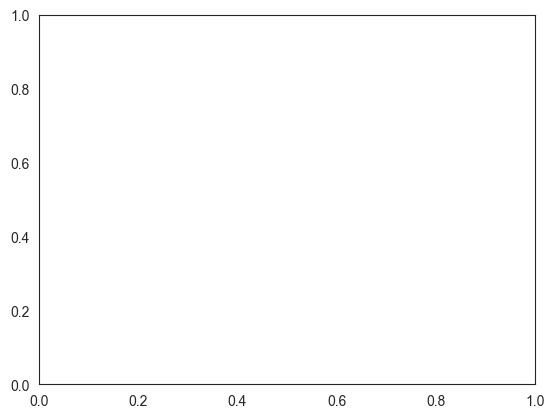

In [3]:
# Several options for the background
for style in ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']: # defines "style" as a list of background style names
    sns.set_style(style) # the style name for each loop
    sns.histplot( # set the histogram
    uniform_data,
    bins=100,
    facecolor = 'skyblue',
    kde=True,
    kde_kws=dict(cut=3))
    plt.show() # plot the histogram

### Binomial distribution
Binomial distribution describes the distribution of binary data from a finite sample. Thus it gives the probability of getting r events out of n trials.

In [ ]:
from scipy.stats import binom

In [ ]:
binom_data = binom.rvs(n=10, p=0.5, size=10000) # e.g. flipping 10 coins 10000 times and counting each time the number of heads (or tails). Try changing the p (between 0 and 1)
axis = sns.histplot(binom_data, color='skyblue',)
axis.set(xlabel='Binomial Distribution', ylabel='Frequency')
plt.show()

### Poisson distribution

A Poisson distribution is a discrete probability distribution. It gives the probability of an event happening a certain number of times (k) within a given interval of time or space. The Poisson distribution has only one parameter, λ (lambda), which is the mean number of events.

In [ ]:
from scipy.stats import poisson

In [ ]:
poisson_data = poisson.rvs(1.5, size=1000) # 1000 counts, location parameter = 1.5 (the value with the highest count frequency)
axis = sns.histplot(poisson_data, color='skyblue',)
axis.set(xlabel='Poisson Distribution', ylabel='Frequency')
plt.show()

### Exponential distribution

The exponential distribution is often concerned with the amount of time until some specific event occurs.

In [ ]:
from scipy.stats import expon

In [ ]:
expon_data = expon.rvs(scale=1, loc=0, size=1000)
axis = sns.histplot(
    expon_data,
    bins=100,
    kde=True,
    color='skyblue',
    line_kws={'linewidth':2, 'alpha':0.6},
    kde_kws=dict(cut=3))
axis.lines[0].set_color("darkred") # to color the kde line as dark red.
axis.set(xlabel='Exponential Distribution', ylabel='Frequency')
plt.show()

### Normal (or Gaussian) distribution

A symmetrical distribution defined by the mean and standard deviation. Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. 

In [ ]:
from scipy.stats import norm

In [ ]:
normal_data = norm.rvs(size=90000, loc=20, scale=30)
axis = sns.histplot(
    normal_data,
    bins=100,
    kde=True,
    color='skyblue',
    line_kws={'linewidth':2, 'alpha':0.6})
axis.lines[0].set_color("darkred") # to color the kde line as dark red.
axis.set(xlabel='normal Distribution', ylabel='Frequency')
plt.show()


### Central Limit Theorem (CLT)
The normal distribution is related to the Central Limit Theorem (CLT) which states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed, even if the population is not normally distributed.


In [ ]:
import numpy
 
# number of samples
num = [1, 10, 50, 100] # list of the different sample sizes that will be used

# list of sample means
means = [] # This empty list will store the sample means for each sample size.
 
# Generating 1, 10, 50, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    numpy.random.seed(1) # sets the random seed (to ensure always the same result)
    x = [numpy.mean(
        numpy.random.randint( # Return random integers from the “discrete uniform” distribution - Generates j random integers between -40 and 40 (inclusive of -40, exclusive of 40).
            -40, 40, j)) for _i in range(10000)] # Repeats this process 10,000 times (to create a large distribution of sample means).
    means.append(x) # this will store the 10,000 means in list x
k = 0
 
# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = f"{'n='}{num[k]}") # sets the titles by unpacking and joining "n=" and "num(k)" using f-string.
        k = k + 1 # sets k for the following loop (starts by k=0 and ends on k=3)
plt.show()